In [32]:
import pandas as pd

url = 'https://raw.githubusercontent.com/majeed76/Renewable-System-Optimization/main/Timeseries_2022.csv'
df = pd.read_csv(url, skiprows=10, sep=",", engine='python', on_bad_lines='skip')


In [33]:
import pandas as pd

# قراءة الملف مباشرة بعد رفعه
df = pd.read_csv("Timeseries_2022.csv", skiprows=10, sep=",")

# عرض أسماء الأعمدة
print("✅ Column names:")
print(df.columns)

# عرض أول 5 صفوف
print("\n📊 First 5 rows:")
print(df.head())


✅ Column names:
Index(['time', 'P', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

📊 First 5 rows:
            time    P  G(i)  H_sun    T2m  WS10m  Int
0  20220101:0010  0.0   0.0    0.0  11.26   3.31  0.0
1  20220101:0110  0.0   0.0    0.0  10.64   3.31  0.0
2  20220101:0210  0.0   0.0    0.0  10.31   3.52  0.0
3  20220101:0310  0.0   0.0    0.0   9.90   3.72  0.0
4  20220101:0410  0.0   0.0    0.0   9.53   3.86  0.0


In [34]:
# === إعداد معطيات النظام الشمسي ===
panel_area = 2.56         # مساحة اللوح الواحد (م²)
panel_efficiency = 0.156  # كفاءة اللوح
num_panels = 1000         # عدد الألواح الشمسية

# === تحويل القيم إلى float إذا لزم ===
df['G(i)'] = pd.to_numeric(df['G(i)'], errors='coerce')

# === حساب إنتاج كل ساعة (kWh) ===
df['E_solar_kWh'] = num_panels * panel_area * panel_efficiency * df['G(i)'] / 1000

# === حساب إجمالي الإنتاج السنوي ===
total_production = df['E_solar_kWh'].sum()
print(f"\n☀️ Total annual solar energy: {total_production:.2f} kWh for {num_panels} panels")

# === عرض أول 5 نتائج كمثال ===
print("\n🔍 Sample hourly production:")
print(df[['time', 'G(i)', 'E_solar_kWh']].head())



☀️ Total annual solar energy: 592322.67 kWh for 1000 panels

🔍 Sample hourly production:
            time  G(i)  E_solar_kWh
0  20220101:0010   0.0          0.0
1  20220101:0110   0.0          0.0
2  20220101:0210   0.0          0.0
3  20220101:0310   0.0          0.0
4  20220101:0410   0.0          0.0


<ipython-input-35-1696036912>:26: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


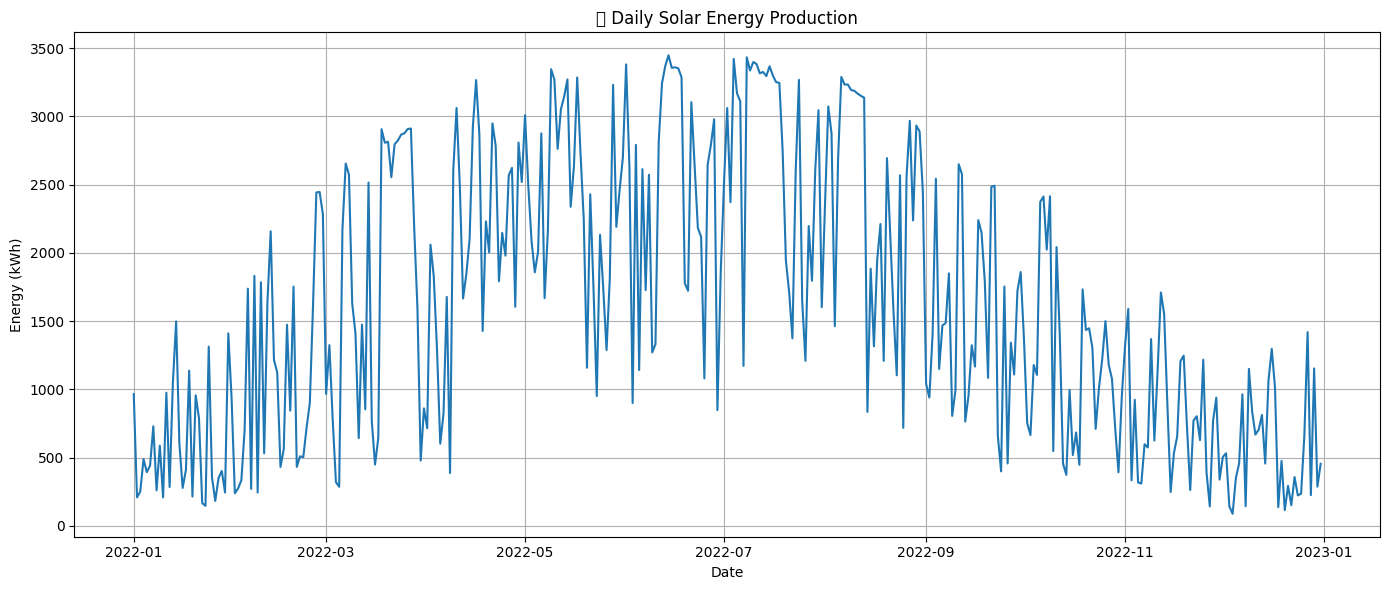

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# === قراءة البيانات من الملف الذي رفعته ===
df = pd.read_csv("Timeseries_2022.csv", skiprows=10, sep=",", engine='python', on_bad_lines='skip')

# === تحويل الوقت إلى datetime ===
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M', errors='coerce')
df = df.dropna(subset=['time'])

# === تحويل عمود الإشعاع إلى رقمي وحساب الإنتاج الشمسي ===
df['G(i)'] = pd.to_numeric(df['G(i)'], errors='coerce')
df['E_solar_kWh'] = 1000 * 2.56 * 0.156 * df['G(i)'] / 1000

# === استخراج التاريخ اليومي ===
df['date'] = df['time'].dt.date
daily_production = df.groupby('date')['E_solar_kWh'].sum()

# === رسم الإنتاج اليومي ===
plt.figure(figsize=(14, 6))
plt.plot(daily_production.index, daily_production.values)
plt.title("📅 Daily Solar Energy Production")
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-36-3068128173>:16: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


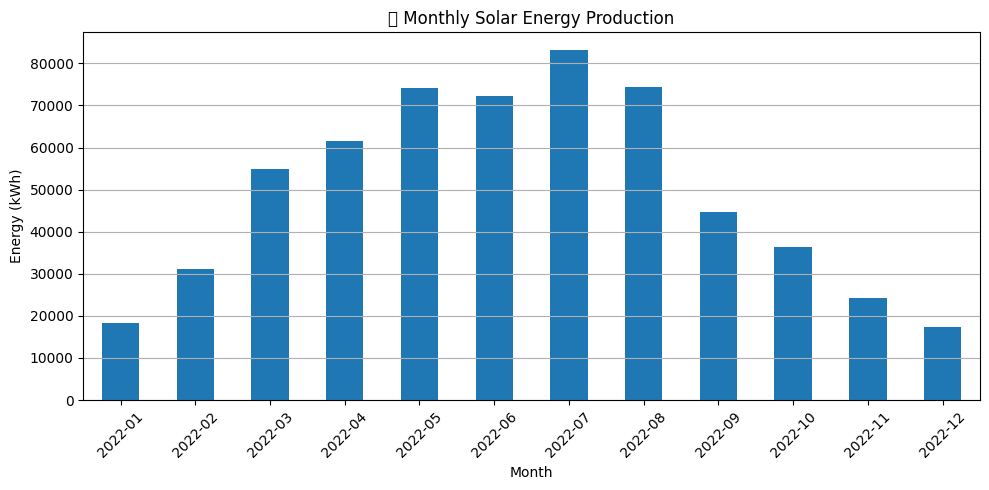

In [36]:
# تحويل الوقت إلى شهر-سنة
df['month'] = df['time'].dt.to_period('M')

# تجميع الإنتاج الشهري
monthly_production = df.groupby('month')['E_solar_kWh'].sum()

# رسم البيانات الشهرية
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
monthly_production.plot(kind='bar')
plt.title("📆 Monthly Solar Energy Production")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
